<a href="https://colab.research.google.com/github/Alexander-1380/Yandex_practicum/blob/main/Yandex_Practicum_final_project_banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Банки — Анализ оттока клиентов "Метанпром".

### Задача**:**

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*
    

### Описание датасетов

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности
/ `equity`  — количество баллов собственности
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` / `last_activity` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

### Данные:

[bank_scrooge.csv](https://disk.yandex.ru/d/koh47_A61aYiYQ) - по рекомендации тимлида выберем второй датасет

### Дашборды

Чтобы отправить дашборд, приложите к проекту ссылку на файл.

Выберите один из наборов (выбор сделаем когда дойдем до этого пункта учитывая полученную к тому времени информацию):

Набор №1

1. Постройте диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавьте индикатор процента ушедших клиентов.
3. Добавьте фильтр дашборда по городу.

Набор №2

1. Постройте диаграмму, отображающую распределение заработной платы клиентов.
2. Добавьте индикатор, отображающий процент клиентов, имеющих кредитную карту.
3. Добавьте фильтр дашборда, позволяющий выбрать ушёл клиент или нет.

# Декомпозиция.

Декомпозируем работу над проектом на следующие части:

### 1. Предобратока данных
- загрузка данных,
- вывод общей информации,
- переименование столбцов,
- поиск пропусков,
- обработка пропусков по возможности,
- приведение формата в соответствие с типом данных,
- поиск явных дубликатов,
- поиск неявных дубликатов,
- промежуточные выводы.

### 2. Исследовательский анализ данных  
- категоризация клиентов по уровню дохода. Введение отдельного столбца с категориями,
- построение визуализаций распределения параметров клиентов в датасете,
- дополнительная категоризация по другим признакам при необходимости,
- поэтапное определение влияния каждого параметра клиентов датасета на параметр churn,
- составление портретов ушедшего клиента и сохранившегося клиента, определение главных отличий, построение наглядных визуализаций,
- промежуточные выводы.

### 3. Проверка статистических гипотез:
- гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались,
- гипотез влияния тех параметров, по которым на предыдущем этапе будет найдено серьезное различие между сохранившимися и ушедшими клиентами,
- общие выводы по исследованию, рекомендации для заказчика.

### 4. Подготовка презентации с графиками, выводами и рекомендациями.

# 1. Предобратока данных

In [ ]:
# загружаем необходимые в проекте библиотеки
# !pip install phik

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats
from matplotlib.ticker import FuncFormatter
#import plotly.express as px
#import json
#from folium import Map, Choropleth, Marker
#from folium.plugins import MarkerCluster
#import numpy as np
#import os
# import datetime as dt
# from datetime import datetime, timedelta
# import math as mth

In [ ]:
# загружаем данные

#bank = pd.read_csv('/Users/alex/Desktop/Yandex_projects/Ya_final_project_banks/bank_scrooge.csv')
#except:
#    bank= pd.read_csv('/datasets/bank_scrooge.csv')


# выведем данные и информацию о датафрейме
#display(bank)
#bank.info()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# путь к файлу
file_path_1 = "/content/drive/My Drive/Colab Notebooks/YandexPrakticum/Ya_final_project/bank_scrooge.csv"
file_path_2 = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"

# загружаем датафрейм
try:
  bank= pd.read_csv(file_path_1)
except:
  bank = pd.read_csv(file_path_2)

# выведем общую иинформацию
display(bank)
bank.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [ ]:
# переименуем столбцы

bank = bank.rename(columns={'USERID':'user_id', 'EST_SALARY':'estimated_salary'})
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [ ]:
# посмотрим датафрейм на предмет пропусков. Выведем количество пропусков в процентах

pd.DataFrame(round(bank.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.300000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [ ]:
# пропусков в столбце age 0.3% - можем просто удалить.

bank = bank.dropna(subset='age')
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           9974 non-null   int64  
 1   score             9974 non-null   float64
 2   city              9974 non-null   object 
 3   gender            9974 non-null   object 
 4   age               9974 non-null   float64
 5   equity            9974 non-null   int64  
 6   balance           7695 non-null   float64
 7   products          9974 non-null   int64  
 8   credit_card       9974 non-null   int64  
 9   last_activity     9974 non-null   int64  
 10  estimated_salary  9974 non-null   float64
 11  churn             9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


In [ ]:
# записей с пропусками в столбце balance около 23% от массива, просто удалить
# их нельзя. Посмотрим на них

display(bank.query('balance.isna()'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


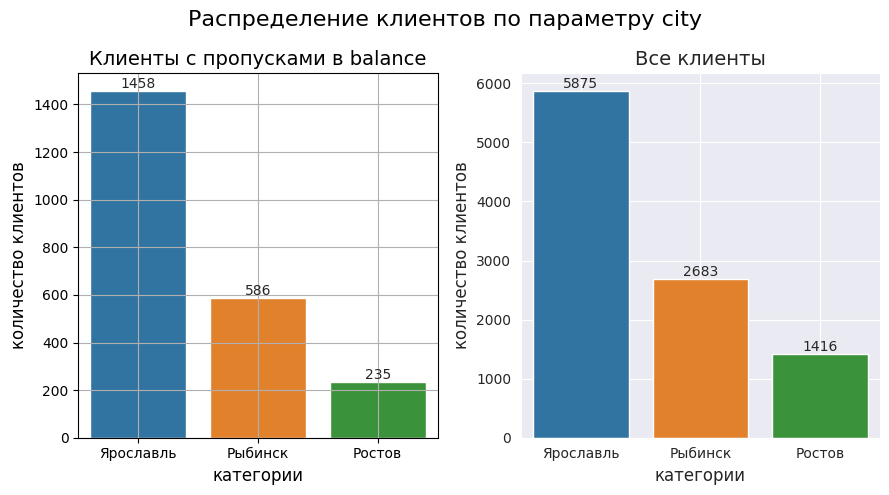

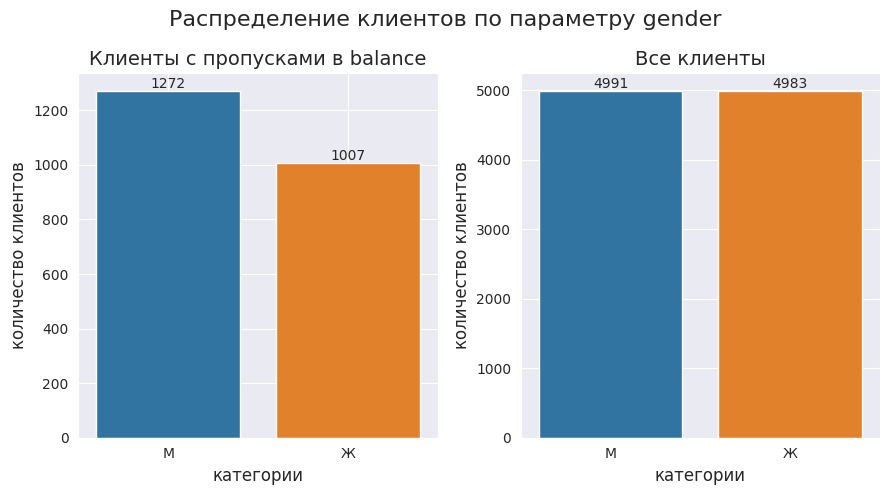

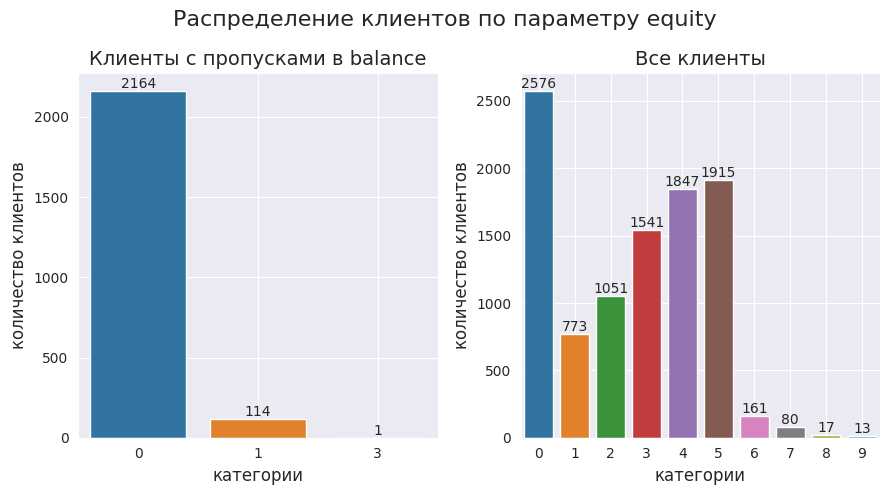

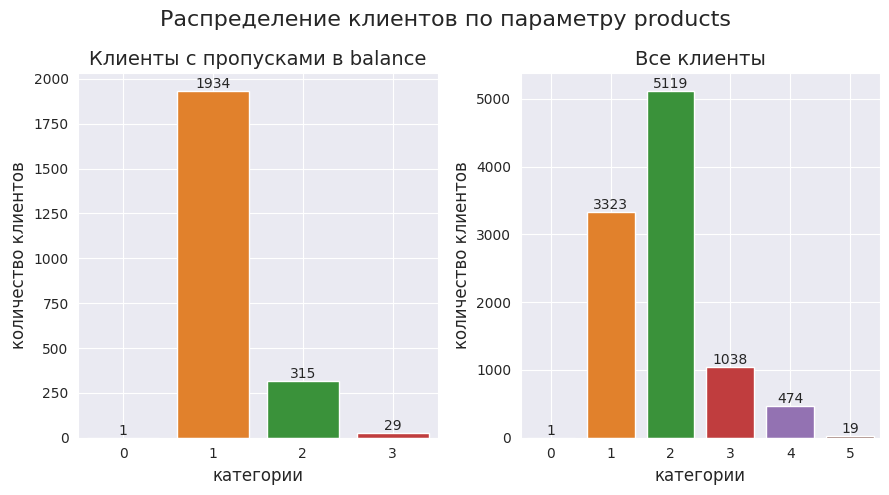

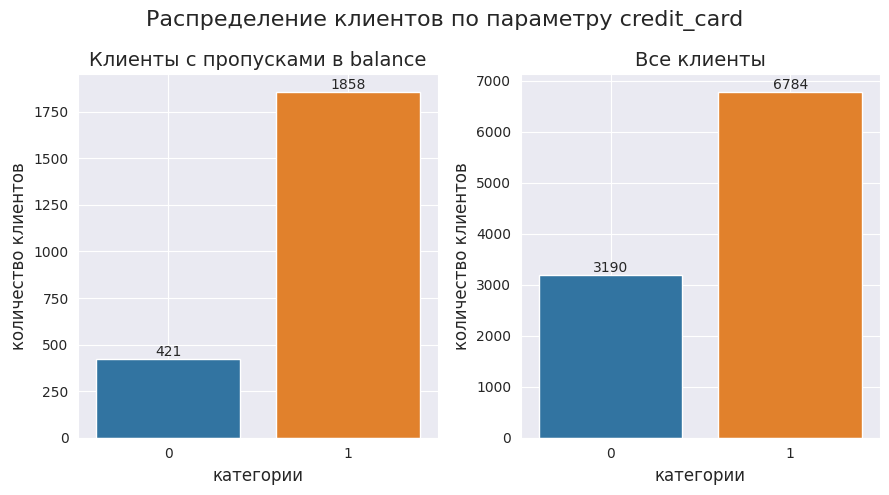

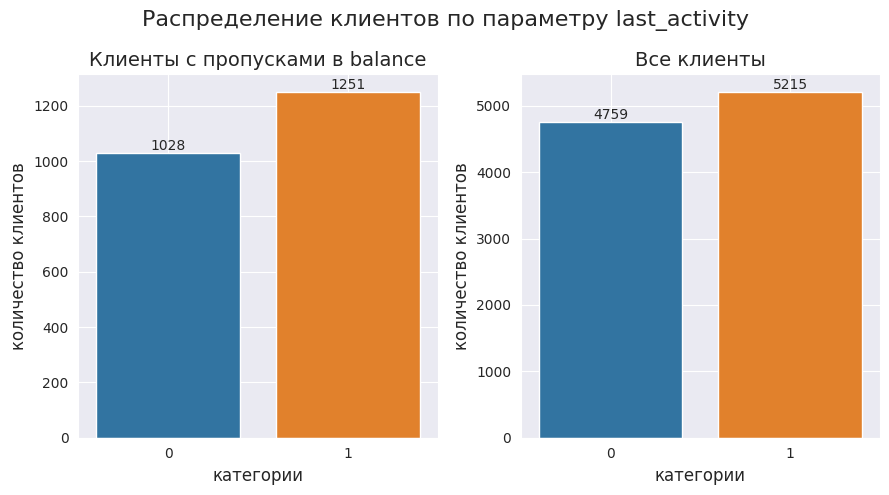

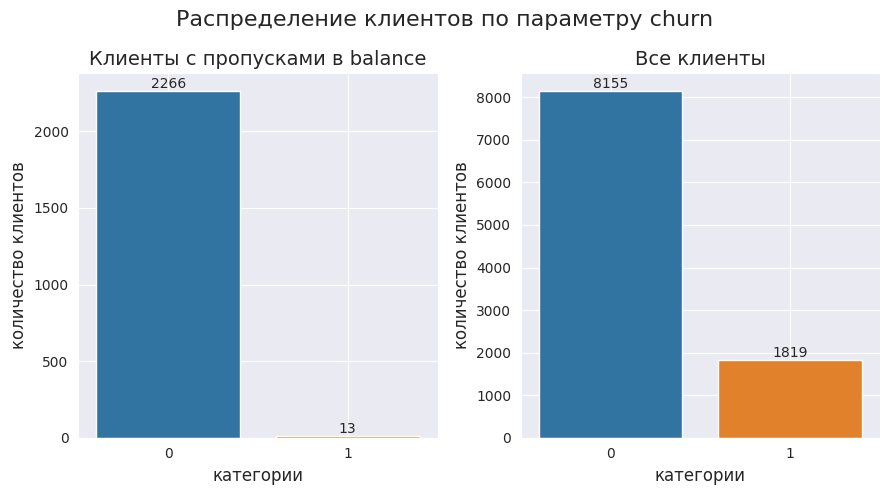

<ipython-input-8-51b3ab7dba4d>:63: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


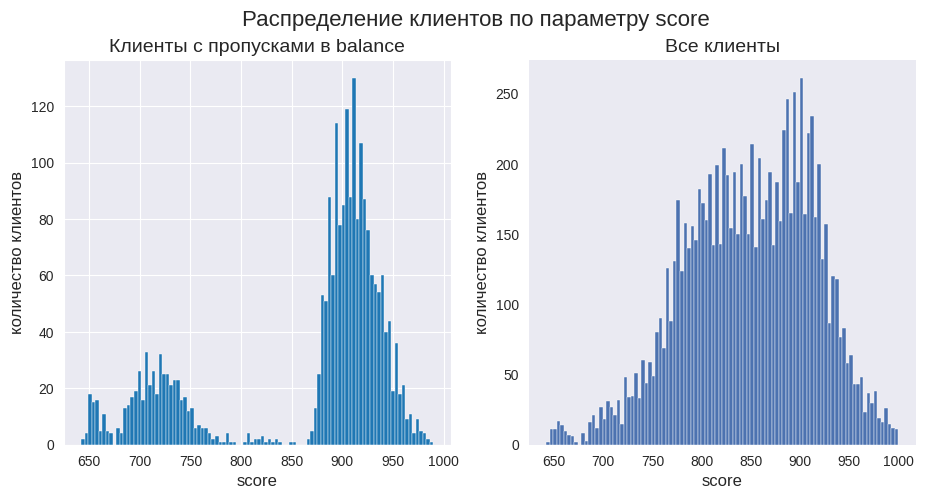

<ipython-input-8-51b3ab7dba4d>:63: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


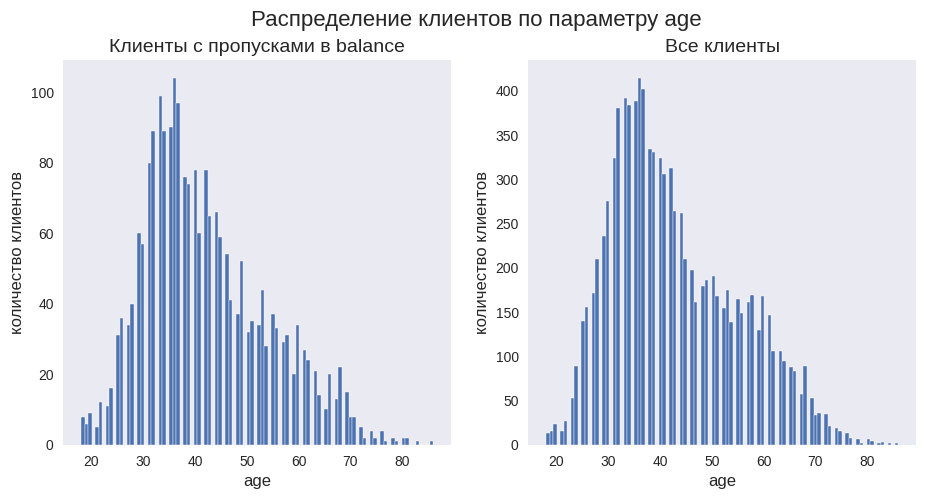

<ipython-input-8-51b3ab7dba4d>:63: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


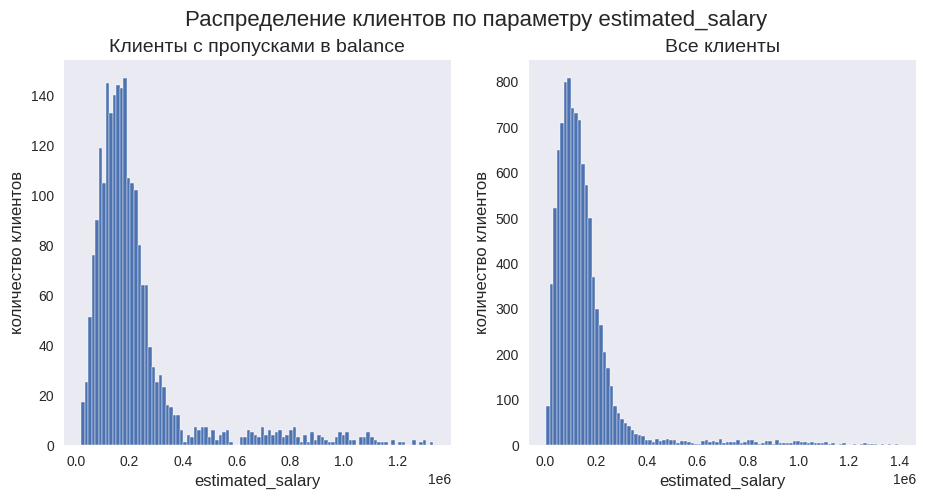

In [ ]:
# прверим распределение пользователей с пропуском в balance

# по категориям для столбцов с категориальными значениями:
checklist_cat = ['city', 'gender', 'equity', 'products', 'credit_card',
          'last_activity', 'churn']

# и по непрерывным переменным:
checklist_contin = ['score', 'age', 'estimated_salary']

# для столбцов с категориальными значениями построим сравнительные барплоты
for p in checklist_cat:
    # создадим сводную таблицу для графика улиц с одним заведением
    pivot_nan_balance = (
        bank.query('balance.isna()').groupby(p, as_index=False)['user_id'].
        count().sort_values(by='user_id', ascending=False)
    )

    # создадим сводную таблицу для графика всей массы заведений
    pivot_all = bank.groupby(p,
                             as_index=False)['user_id'].count().sort_values(by='user_id', ascending=False)

    # для выявления особенностей распределений пользователей с пропуском в balance
    # будем строить рядом графики для них и для всего датафрейма
    plt.figure(figsize=[9, 5])
    plt.suptitle(f'Распределение клиентов по параметру {p}', fontsize=16)

    # строим график для клиентов с пропусками в balance
    plt.subplot(1, 2, 1)
    sns.set_style('dark')
    ax = sns.barplot(x=pivot_nan_balance[p], y='user_id', data=pivot_nan_balance)
    ax.bar_label(ax.containers[0], size=10)
    plt.title('Клиенты с пропусками в balance', fontsize=14)
    plt.ylabel('количество клиентов', fontsize=12)
    plt.xlabel('категории', fontsize=12)
    plt.grid()
    plt.xticks(rotation=0)

    # строим график для всех клиентов
    plt.subplot(1, 2, 2)
    sns.set_style('dark')
    ax = sns.barplot(x=pivot_all[p], y='user_id', data=pivot_all)
    ax.bar_label(ax.containers[0], size=10)
    plt.title('Все клиенты', fontsize=14)
    plt.ylabel('количество клиентов', fontsize=12)
    plt.xlabel('категории', fontsize=12)
    plt.grid()
    plt.xticks(rotation=0)
    patches = ax.patches

    plt.tight_layout()
    plt.show()


# для столбцов с непрерывными переменными построим гистограммы
for p in checklist_contin:
    # для выявления особенностей распределений пользователей с пропуском в balance
    # будем строить рядом графики для них и для всего датафрейма
    plt.figure(figsize=[11, 5])
    plt.suptitle(f'Распределение клиентов по параметру {p}', fontsize=16)

    # строим график для клиентов с пропусками в balance
    plt.subplot(1, 2, 1)
    plt.style.use('seaborn')
    plt.hist(bank.query('balance.isna()')[p], bins=100)
    #ax = sns.histplot(x=pivot_nan_balance[p], y='user_id', data=pivot_nan_balance)
    #ax.bar_label(ax.containers[0], size=10)
    plt.title('Клиенты с пропусками в balance', fontsize=14)
    plt.ylabel('количество клиентов', fontsize=12)
    plt.xlabel(f'{p}', fontsize=12)
    plt.grid()
    #plt.xticks(rotation=0)

    # строим график для всех клиентов
    plt.subplot(1, 2, 2)
    plt.hist(bank[p], bins=100)
    #ax = sns.histplot(x=pivot_all[p], y='user_id', data=pivot_all)
    #ax.bar_label(ax.containers[0], size=10)
    plt.title('Все клиенты', fontsize=14)
    plt.ylabel('количество клиентов', fontsize=12)
    plt.xlabel(f'{p}', fontsize=12)
    plt.grid()
    #plt.xticks(rotation=0)
    #plt.tight_layout()
    plt.show()


Наблюдаем, что клиенты с пропусками в столбце balance отличаются от общей массы по следуюшщим признакам:

1. equity - у клиентов с пропуском в подавляющем большинстве количество баллов собственности 0. То есть собственности у них либо нет, либо нет информации о ней.
2. products - у большинства из них по одному банковскому продукту
3. cfredit_card - среди таких клиентов соотношение количества людей, открывших кредитную карту относительно количества клиентов, не имеющиюх ее, сильно больше чем среди всех клиентов.
4. churn - почти все эти клиенты действующие.
5. score - среди таких клиентов кредитный рейтинг либо не очень хороший в районе 700, либо хороший в районе 950. Среднего же по всей баще клиентов - 850 не наблюдается.


По совокупности найденных характеристик портрета - действующие клиенты, с одной только кредитной картой и без имущества - можем предположить, что пропусками в состоянии лицевого счета в таблице отображается отрицательный баланс, то есть эти клиенты должны банку по кредитам.

Как-либо обрабатывать эти пропуски не будем, оставим Nan и запомним что мы знаем об этих клиентах.

#### 1.5. Поменяем тип данных в следующих столбцах:
- score в формат int
- age в формат int

In [ ]:
bank = bank.astype({'score': 'int64', 'age': 'int64'}, errors='ignore')
bank.dtypes

user_id               int64
score                 int64
city                 object
gender               object
age                   int64
equity                int64
balance             float64
products              int64
credit_card           int64
last_activity         int64
estimated_salary    float64
churn                 int64
dtype: object

### 1.6. поиск явных дубликатов

In [ ]:
bank.duplicated().sum()

0

Явных дубликатов не найдено

### 1.7. поиск неявных дубликатов

У нас всего два строковых столбца, выведем их уникальные значения, чтобы посмотреть есть ли смысл удаления пробелов, замены е на ё и тд для поиска неявных дубликатов.

In [ ]:
for i in ['city', 'gender']:
  display(bank[i].unique())

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

array(['Ж', 'М'], dtype=object)

Все значения в столбцах со строковыми типами данных действительно уникальны, деклаем вывод что неявных дубликатов в датафрейме нет.

Проверим, нет ли дубликатов в столбце user_id

In [ ]:
bank['user_id'].duplicated().sum()

50

Дубликаты обнаружены. Посмотрим на них.

In [ ]:
# выводим строки с дубликатами в столбце 'user_id' попарно
duplicates = bank[bank.duplicated(['user_id'], keep=False)]
display(duplicates.sort_values(by='user_id').head(30))


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1


Видим, что все дубликаты значений по столбцу 'user_id' парные. И в каждой паре у одного клиента значение параметра 'churn' 0 а у другого 1.

Делаем вывод, что когда уходит клиент, то его id передают новому клиенту, причем как правило в другом городе. Для дальнейшего исследования не будем обрабатывать эти дубликаты, так как речь идет о разных клиентах. В дальнейшем, помня об этом, будем использовать для подсчета клиентов метод count вместо метода nunique.

### промежуточные выводы 1 (предобработка)

- Предоставлен датафрейм с информацией о клиентах банка на 12 столбцов и 10000 строк.
- Пропуски в данных о возрасте составляли менее 1% датафрейма и были удалены.
- Пропуски в данных о балансе счета скорее всего свидетельствуют об отрицательном балансе (долге перед банком). Сохранены в исходном виде во избежание искажения данных.
- Дубликаты в данных отсутствуют.
- Встречаются дубликаты в столбце user_id - это особенность системы, и речь идет о разных пользователях.

Двигаемся дальше.

# 2. Исследовательский анализ данных  
### 2.1. категоризация клиентов по уровню дохода. Введение отдельного столбца с категориями


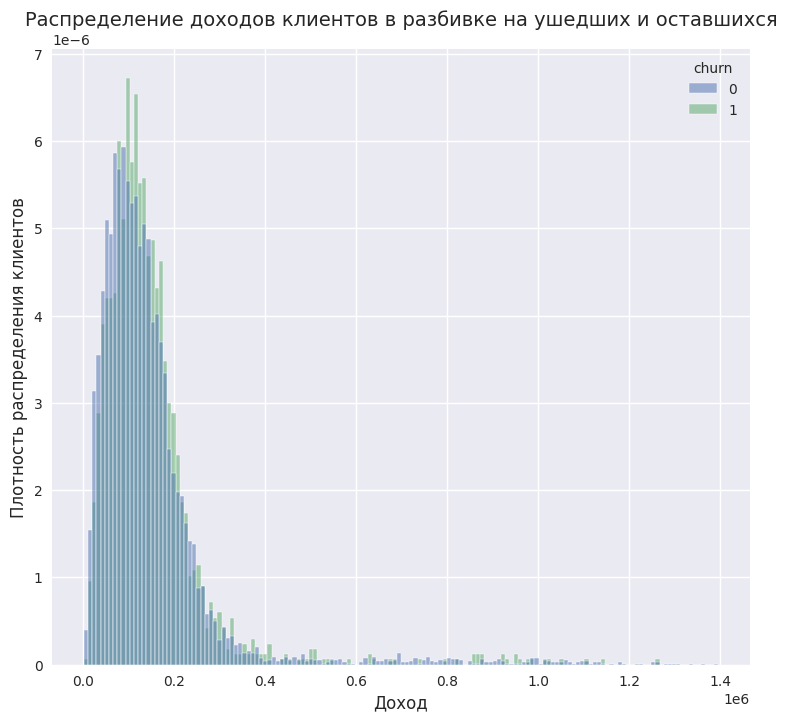

In [ ]:
# еще раз посмотрим на распределение доходов клиентов и попробуем оценить его влияние на параметр churn

plt.figure(figsize=[9, 8])
sns.set_style('dark')
sns.histplot(data=bank, x='estimated_salary', hue='churn', stat="density", common_norm=False)
plt.title('Распределение доходов клиентов в разбивке на ушедших и оставшихся', fontsize=14)
plt.ylabel('Плотность распределения клиентов', fontsize=12)
plt.xlabel('Доход', fontsize=12)
plt.grid()
plt.show()

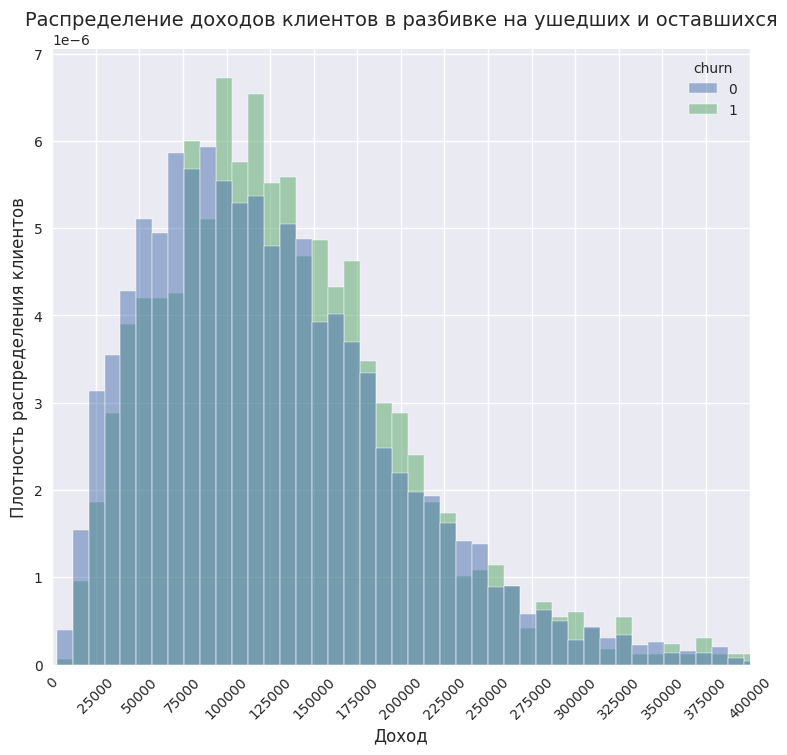

In [ ]:
# ограничим ось x до 400к

plt.figure(figsize=[9, 8])
sns.set_style('dark')
sns.histplot(data=bank, x='estimated_salary', hue='churn', stat="density", common_norm=False)
plt.title('Распределение доходов клиентов в разбивке на ушедших и оставшихся', fontsize=14)
plt.ylabel('Плотность распределения клиентов', fontsize=12)
plt.xlabel('Доход', fontsize=12)
plt.locator_params(axis='x', nbins=16)
plt.xlim(left=0, right=400000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Выяснили, что процент ушедших клиентов возрастает при доходе клиента от 80 000 до 200 000.
Проведем категоризацию клиентов по этим границам

In [ ]:
# напишем функцию для категоризации по доходу:
def cat(value):
  if 0 <= value <= 80000:
    return 'A'
  elif 80000 < value <= 200000:
    return 'B'
  elif value > 200000:
    return 'C'

# добавим столбец с категорией дохода
bank['income_category'] = bank['estimated_salary'].apply(cat)
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,income_category
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,A
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,B
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,B
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,B
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,A
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,B
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,B
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,B


### 2.2. построение визуализаций распределения параметров клиентов в датасете,


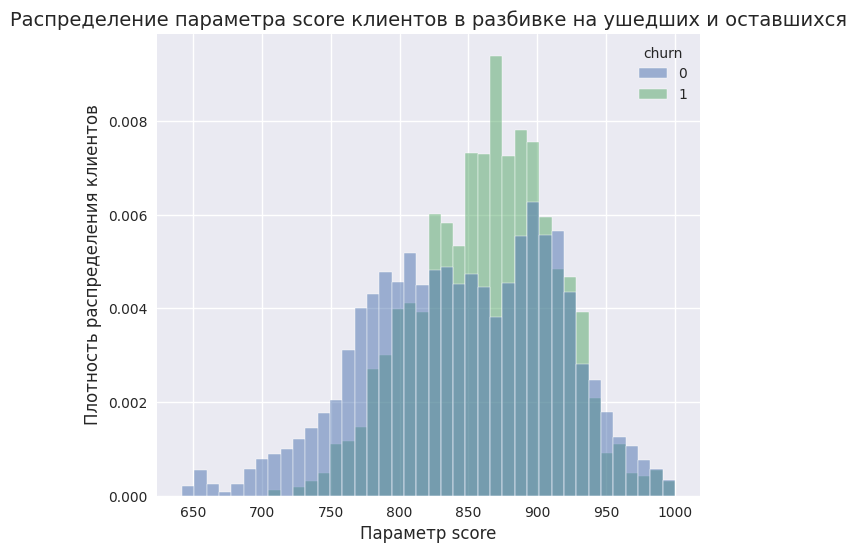

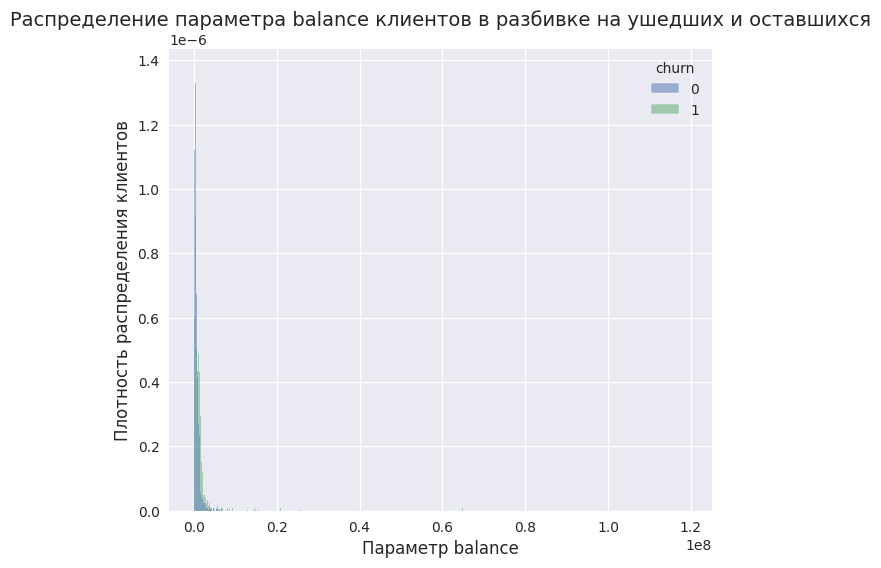

<ipython-input-17-08cdc7aeb970>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=10)


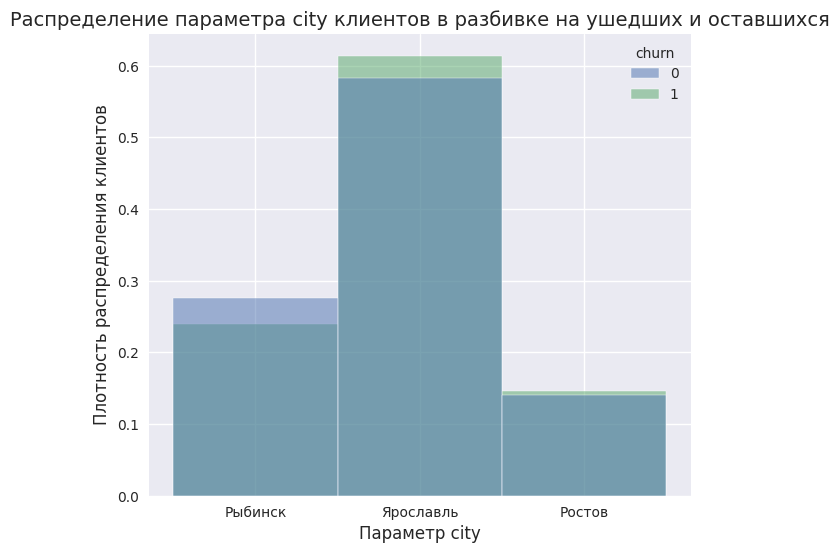

<ipython-input-17-08cdc7aeb970>:12: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=10)


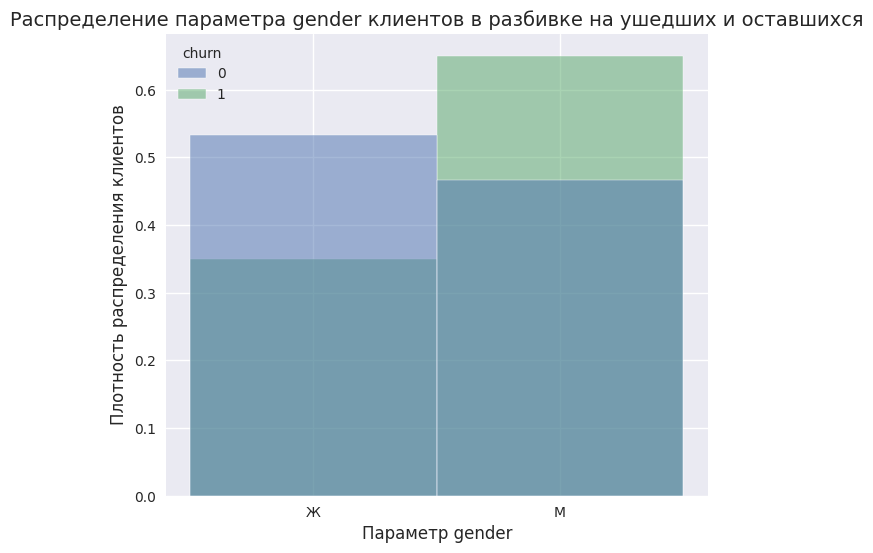

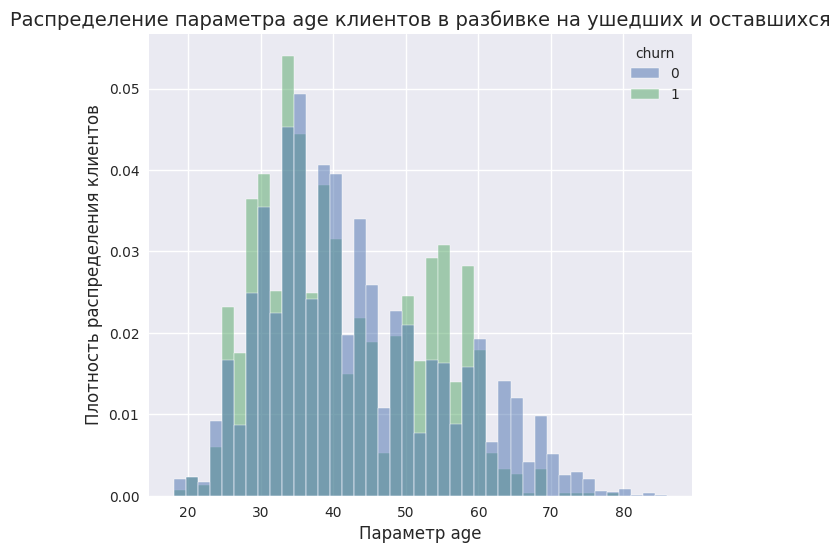

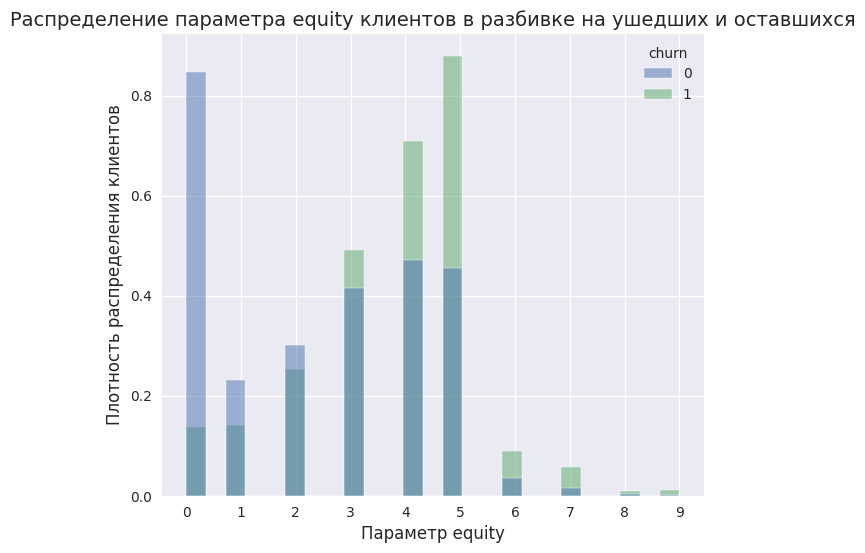

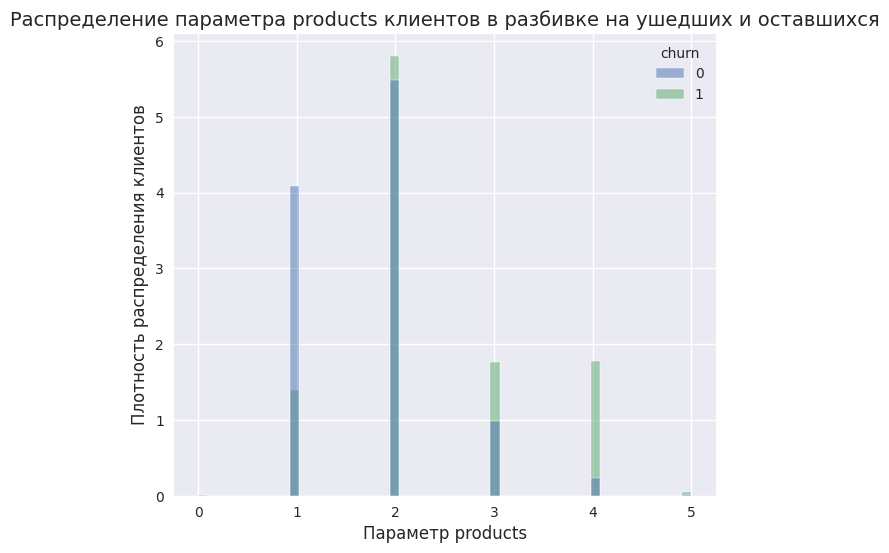

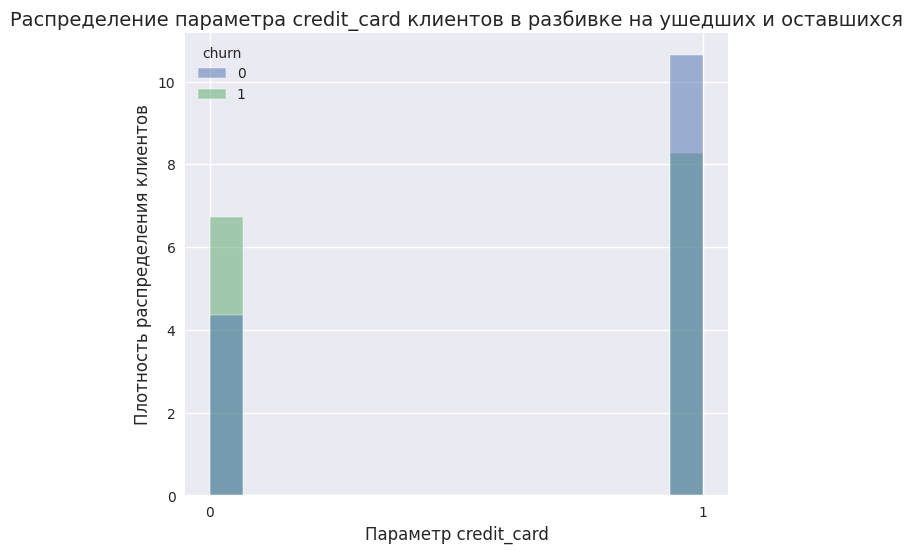

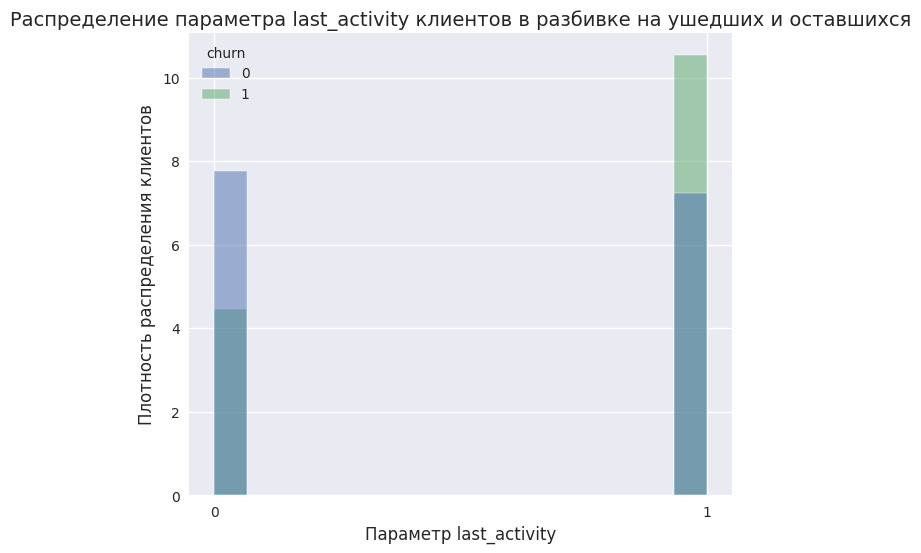

In [ ]:
# посмотрим на Плотность распределения клиентов по параметрам в разбивке на ушедших и оставшихся

def format_x_axis(x, pos):
    return '{:.0f}'.format(x)

for i in ['score', 'balance', 'city', 'gender',	'age',	'equity', 'products',	'credit_card',	'last_activity']:
  plt.figure(figsize=[7, 6])
  sns.histplot(data=bank, x=i, hue='churn', stat="density", common_norm=False)
  plt.title(f'Распределение параметра {i} клиентов в разбивке на ушедших и оставшихся', fontsize=14)
  plt.ylabel('Плотность распределения клиентов', fontsize=12)
  plt.xlabel(f'Параметр {i}', fontsize=12)
  plt.locator_params(axis='x', nbins=10)
  if i in ['equity', 'products',	'credit_card',	'last_activity']:
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis))
  if i in ['credit_card',	'last_activity']:
    plt.locator_params(axis='x', nbins=2)
  plt.grid()
  plt.show()

Выяснили, что чаще других уходят клиенты:
- с кредитным рейтингом 820-930
- жители Ярославля
- мужчины
- люди между 25 и 33 и между 50 и 60 годами
- люди с количеством баллов собственности от 3-х, чем больше тем чаще
- люди с количеством банковских продуктов от 2х, а начиная от 4-х клиенты чаще уходят чем остаются
- клиенты, у которых нет кредитных карт
- активные клиенты


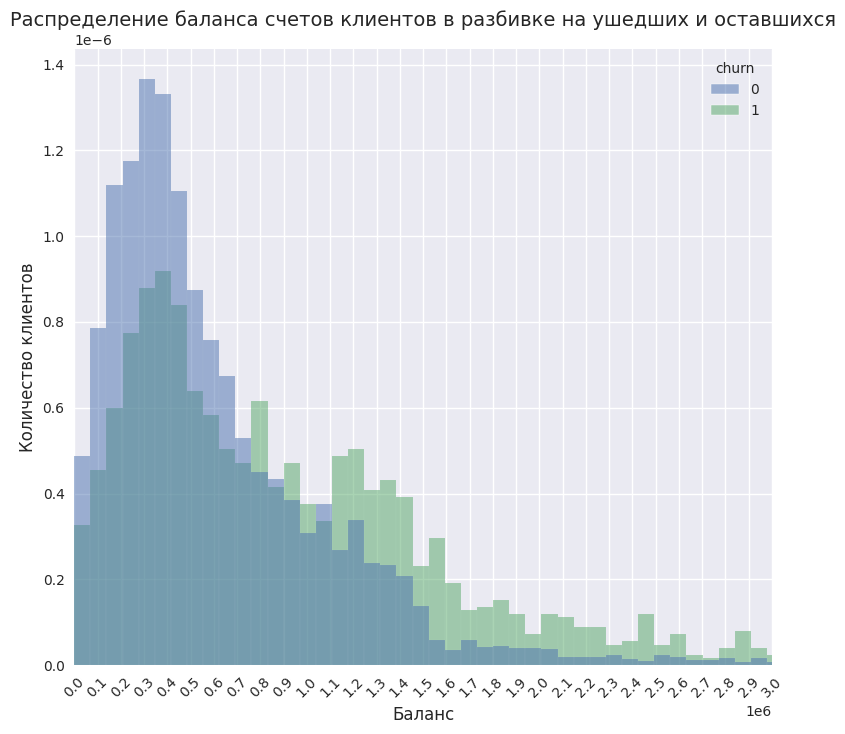

In [ ]:
# balance рассмотрим ближе

plt.figure(figsize=[9, 8])
sns.set_style('dark')
sns.histplot(data=bank, x='balance', hue='churn', stat="density", common_norm=False)
plt.title('Распределение баланса счетов клиентов в разбивке на ушедших и оставшихся', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Баланс', fontsize=12)
plt.locator_params(axis='x', nbins=35)
plt.xlim(left=0, right=3000000)
plt.xticks(rotation=45)
plt.grid()
plt.show()

видим, что процент ушедших клиентов начинает увеличиваться начиная с баланса счета от 800 000.

### 2.3. Дополнительная категоризация по другим признакам при необходимости

Исходя из предыдущего исследования, проведем дополнительную категоризацию клиентов:
- по параметру score - с кредитным рейтингом в зоне риска 820-930 и вне его
- по параметру age - между 25 и 33 и между 50 и 60 годами



In [ ]:
# напишем функцию для категоризации по кредиитному рейтингу:
def score_cat(value):
  if 820 <= value <= 930:
    return 'risk_score'
  else:
    return 'other'

# напишем функцию для категоризации по возрасту:
def age_cat(value):
  if value < 25:
    return '<25'
  elif 25 <= value < 33:
    return '25-33'
  elif 33 <= value < 50:
    return '33-50'
  elif 50 <= value < 60:
    return '50-60'
  else:
    return '60+'


# добавим столбецы с категориями дохода
bank['score_cat'] = bank['score'].apply(score_cat)
bank['age_cat'] = bank['age'].apply(age_cat)
bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,estimated_salary,churn,income_category,score_cat,age_cat
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,A,risk_score,25-33
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,B,risk_score,33-50
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,B,risk_score,25-33
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,B,risk_score,50-60
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,A,other,33-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,A,other,25-33
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,B,risk_score,33-50
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,B,risk_score,<25
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,B,other,60+


### 2.4. Поэтапное определение влияния каждой категории клиентов датасета на параметр churn


In [ ]:
# проверим корреляции параметров с помощью коэффициента корреляции Фика

cols_to_keep = ['score',	'city',	'gender',	'age',	'equity',	'balance',
                'products',	'credit_card',	'last_activity',	'estimated_salary',
                'churn',	'income_category',	'score_cat',	'age_cat']

bank_phik = bank[cols_to_keep]


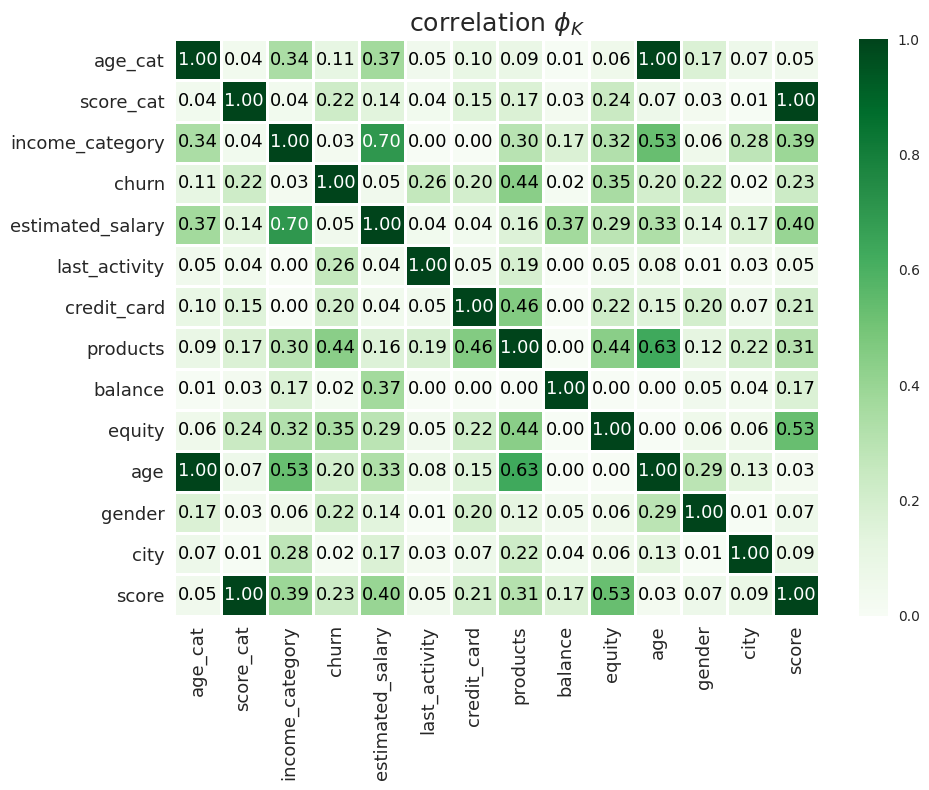

In [ ]:
# зададим функции интервальные столбцы
interval_cols = ['score', 'balance', 'estimated_salary']

# построим матрицу
phik_overview = bank_phik.phik_matrix(interval_cols=interval_cols).round(2)
#phik_overview.round(2)


plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.3,
                        figsize=(10, 8))
plt.tight_layout()

Наибольшую корреляция с параметром churn дает параметр products. На втором месте параметр equity. На третьем - last_activity.

In [ ]:
# рассмотрим все комбинации категорий по три
check_list = ['income_category=="B"',
              'score_cat=="risk_score"',
              'city=="Ярославль"',
              'gender=="М"',
              'age_cat=="25-33"',
              'age_cat=="50-60"',
              'equity>2',
              'products>1',
              'credit_card==0',
              'last_activity==1',
              'balance>=800000']

# зададим списки для значений сегмента, количества людей в нем и процент оттока
segment_list = []
amount_list = []
churn_rate_list = []

# с помощью тройного цикла переберем комбинации нужных сегментов
for i in check_list:
    for j in check_list:
        for f in check_list:
            if j != i and i != f and f != j:
                amount = bank.query(i + '&' + j + '&' + f)['user_id'].count()
                churn_rate = round(bank.query(i + '&' + j + '&' + f)['churn'].mean() * 100, 1)
                segment = f'{i}, {j} и {f}'
                segment_list.append(segment)
                amount_list.append(amount)
                churn_rate_list.append(churn_rate)

In [ ]:
# соберем результат в датафрейм
result = pd.DataFrame({'segment':segment_list, 'amount':amount_list, 'churn_rate':churn_rate_list})

# удалим дубликаты
result = result.drop_duplicates(subset=['amount', 'churn_rate'])

# добавим значение количества ушедших клиентов
result['churn_amount'] = round(result['amount'] * result['churn_rate'] / 100)

# отфильтруем результаты чтобы процент оттока был не менее 50% и
# выведем top-5 результатов, отсортируем по числу ушедших клиентов
display(result.query('churn_rate>50').sort_values(by='churn_amount', ascending=False).head())

,segment,amount,churn_rate,churn_amount
620,"equity>2, last_activity==1 и balance>=800000",1207,50.3,607.0
710,"products>1, last_activity==1 и balance>=800000",1172,51.0,598.0
170,"score_cat==""risk_score"", last_activity==1 и ba...",881,58.2,513.0
116,"score_cat==""risk_score"", gender==""М"" и balance...",866,51.8,449.0
260,"city==""Ярославль"", last_activity==1 и balance>...",763,54.9,419.0


выводы см в следующем блоке

### 2.5. составление портрета ушедшего клиента.

Выявлены топ-5 сегментов клиентов по количеству клиентов, которые могут уйти:
- активные клиенты с баллами собственности более 2 и балансом счета более 800 тысяч - отток 50.3%, общее количество 607 человек
-  активные клиенты с количеством банковских продуктов более 1 и балансом счета более 800 тысяч - отток 51.0%, общее количество 598 человек
- активные клиенты с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 58.2%, общее количество 513 человек
- мужчины с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 51.8%, общее количество 449 человек - активные жители Ярославля и балансом счета более 800 тысяч - отток 54.9%, общее количество 419 человек



### 2.6. Промежуточные выводы 2

1. Выяснили, что процент ушедших клиентов возрастает при доходе клиента от 80 000 до 200 000. Проведем категоризацию клиентов по этим границам

2. Выяснили, что чаще других уходят клиенты:
- с кредитным рейтингом 820-930
- жители Ярославля
- мужчины
- люди между 25 и 33 и между 50 и 60 годами
- люди с количеством баллов собственности от 3-х, чем больше тем чаще
- люди с количеством банковских продуктов от 2х, а начиная от 4-х клиенты чаще уходят чем остаются
- клиенты, у которых нет кредитных карт
- активные клиенты

3. Процент ушедших клиентов начинает увеличиваться начиная с баланса счета от 800 000.

4. Наибольшую корреляция с параметром churn дает параметр products. На втором месте параметр equity. На третьем - last_activity.

5. Выявлены топ-5 сегментов клиентов по количеству клиентов, которые могут уйти:
- активные клиенты с баллами собственности более 2 и балансом счета более 800 тысяч - отток 50.3%, общее количество 607 человек
-  активные клиенты с количеством банковских продуктов более 1 и балансом счета более 800 тысяч - отток 51.0%, общее количество 598 человек
- активные клиенты с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 58.2%, общее количество 513 человек
- мужчины с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 51.8%, общее количество 449 человек - активные жители Ярославля и балансом счета более 800 тысяч - отток 54.9%, общее количество 419 человек


# 3. Проверка статистических гипотез.

### 3.1. Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.


In [ ]:
# выделим из датафрейма выборки по доходу ушедших и оставшихся клиентов
sampleA = bank.query('churn==0')['estimated_salary']
sampleB = bank.query('churn==1')['estimated_salary']

С помощью критерия Шапиро проверим выборки на нормальное распределение.<br>
- Нулевая гипотеза - выборка распределена нормально.<br>
- Альтернативная гипотеза - выборка НЕ распределена нормально.

если p-value меньше уровня значимости, значит, выборки распределены ненормально. Уровень знчимости зададим 0.05

In [ ]:
stats.shapiro(sampleA), stats.shapiro(sampleB)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.6149197816848755, pvalue=0.0),
 ShapiroResult(statistic=0.6442373991012573, pvalue=0.0))

p-value обоих выборок равны нулю, соответственно отвергаем нулевую гипотезу, то есть выборки не распределены нормально.

Поэтому для изучения разницы между выборками будем применять критерий Манна-Уитни.

Зададим гипотезы:
- Нулевая: статистически значимых различий в доходе между группами нет.
- Альтернативная: в доходе между группами есть статистически значимые различия.

Уровень значимости зададим 0.05

In [ ]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.median() / sampleA.median() - 1))

0.00019
0.061


p-value получилось сильно меньше уровня значимости, поэтому отвергаем нулевую гипотезу. Различие между выборками статистически значимо.  

Медианный доход у ушедших клиентов на 6,1% выше чем у оставшихся.

### 3.2. Гипотезы влияния тех параметров, по которым на предыдущем этапе будет найдено серьезное различие между сохранившимися и ушедшими клиентами,


Проверим на ститистическую значимость влияние на уход баланса счета клиентов.

In [ ]:
# выделим из датафрейма выборки по доходу ушедших и оставшихся клиентов, значения Nan дропнем.

sample0 = bank.query('churn==0')['balance'].dropna()
sample1 = bank.query('churn==1')['balance'].dropna()

С помощью критерия Шапиро проверим выборки на нормальное распределение.<br>
- Нулевая гипотеза - выборка распределена нормально.<br>
- Альтернативная гипотеза - выборка НЕ распределена нормально.

если p-value меньше уровня значимости, значит, выборки распределены ненормально. Уровень знчимости зададим 0.05

In [ ]:
stats.shapiro(sample0), stats.shapiro(sample1)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.15495091676712036, pvalue=0.0),
 ShapiroResult(statistic=0.31070476770401, pvalue=0.0))

p-value обоих выборок равны нулю, соответственно отвергаем нулевую гипотезу, то есть выборки не распределены нормально.

Поэтому для изучения разницы между выборками будем применять критерий Манна-Уитни.

Зададим гипотезы:
- Нулевая: статистически значимых различий в балансе счета между группами нет.
- Альтернативная: в балансе счета между группами есть статистически значимые различия.

Уровень значимости зададим 0.05

In [ ]:
print("{0:.6f}".format(stats.mannwhitneyu(sample0, sample1)[1]))

print("{0:.3f}".format(sample1.median() / sample0.median() - 1))

0.000000
0.649


p-value получилось сильно меньше уровня значимости, поэтому отвергаем нулевую гипотезу. Различие между группами статистически значимо.

Медианный баланс счета у ушедших клиентов на 64,9% больше чем у оставшихся.

### 3.3. Промежуточные выводы 3.

- Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались, показала, что различие между группами статистически значимо. Медианный доход у ушедших клиентов на 6,1% выше чем у оставшихся.

- Проверка гипотезы различия баланса счета между теми клиентами, которые ушли и теми, которые остались, показала, что различие между группами статистически значимо. Медианный баланс счета у ушедших клиентов на 64,9% больше чем у оставшихся.

# 4. Общие выводы по исследованию.

## 4.1. Предобработка данных

1. Предоставлен датафрейм с информацией о клиентах банка на 12 столбцов и 10000 строк.
2. Пропуски в данных о возрасте составляли менее 1% датафрейма и были удалены.
3. Пропуски в данных о балансе счета скорее всего свидетельствуют об отрицательном балансе (долге перед банком). Сохранены в исходном виде во избежание искажения данных.
4. Дубликаты в данных отсутствуют.
5. Встречаются дубликаты в столбце user_id - это особенность системы, и речь идет о разных пользователях.

## 4.2. Исследовательский анализ данных

1. Выяснили, что процент ушедших клиентов возрастает при доходе клиента от 80 000 до 200 000. Проведем категоризацию клиентов по этим границам

2. Выяснили, что чаще других уходят клиенты:
- с кредитным рейтингом 820-930
- жители Ярославля
- мужчины
- люди между 25 и 33 и между 50 и 60 годами
- люди с количеством баллов собственности от 3-х, чем больше тем чаще
- люди с количеством банковских продуктов от 2х, а начиная от 4-х клиенты чаще уходят чем остаются
- клиенты, у которых нет кредитных карт
- активные клиенты

3. Процент ушедших клиентов начинает увеличиваться начиная с баланса счета от 800 000.

4. Наибольшую корреляция с параметром churn дает параметр products. На втором месте параметр equity. На третьем - last_activity.

5. Выявлены топ-5 сегментов клиентов по количеству клиентов, которые могут уйти:
- активные клиенты с баллами собственности более 2 и балансом счета более 800 тысяч - отток 50.3%, общее количество 607 человек
-  активные клиенты с количеством банковских продуктов более 1 и балансом счета более 800 тысяч - отток 51.0%, общее количество 598 человек
- активные клиенты с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 58.2%, общее количество 513 человек
- мужчины с кредитным рейтингом в диапазоне 820-930 и балансом счета более 800 тысяч - отток 51.8%, общее количество 449 человек
- активные клиенты из Ярославля и балансом счета более 800 тысяч - отток 54.9%, общее количество 419 человек


## 4.3. Проверка статистических гипотез.

- Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались, показала, что различие между группами статистически значимо. Медианный доход у ушедших клиентов на 6,1% выше чем у оставшихся.

- Проверка гипотезы различия баланса счета между теми клиентами, которые ушли и теми, которые остались, показала, что различие между группами статистически значимо. Медианный баланс счета у ушедших клиентов на 64,9% больше чем у оставшихся.

## 4.4. Рекомендации для заказчика.

Исследование показало, что покидают банк в основном более состоятельные клиенты. Как правило, они активны, их размер накоплений от 800 000, а количество собственности от 2 баллов. Чаще это мужчины. В связи с этим, предлагается рассмотреть запуск банковских продуктов для таких клиентов. Возможно, это премиальные продукты с дополнительными преференциями и бонусами.

# 5. Подготовка презентации с графиками, выводами и рекомендациями.

## Материалы к проекту
* [Презентация](https://drive.google.com/file/d/1skDlKT6CUwxYHG3f7NzGyAvZub3Xcg4f/view?usp=share_link)

* [Дэшборд](https://public.tableau.com/views/Book2_16813011253310/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)